# Introduction 

For this assignment, I have chosen the **Iris dataset** to do a classification task. The objective is to correctly **classify iris flowers** into one of three species based on various measurements of the flowers using Naive Bayes classfier.

## Imports

In [1]:
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## Dataset Overview
- **Number of Data Points**: The Iris dataset contains 150 data points.
- **Number of Features**: There are 4 features in the dataset:
  - Sepal length (cm)
  - Sepal width (cm)
  - Petal length (cm)
  - Petal width (cm)
- **Labels/Classes**: The dataset includes three classes, representing the species of the iris flower:
  - Iris-setosa
  - Iris-versicolor
  - Iris-virginica


## Graphical Representation of the Data
We are going to visualize the relationships between each of the iris species and the four features (Petal Width, Sepal Length, Sepal Width, and Petal Length).

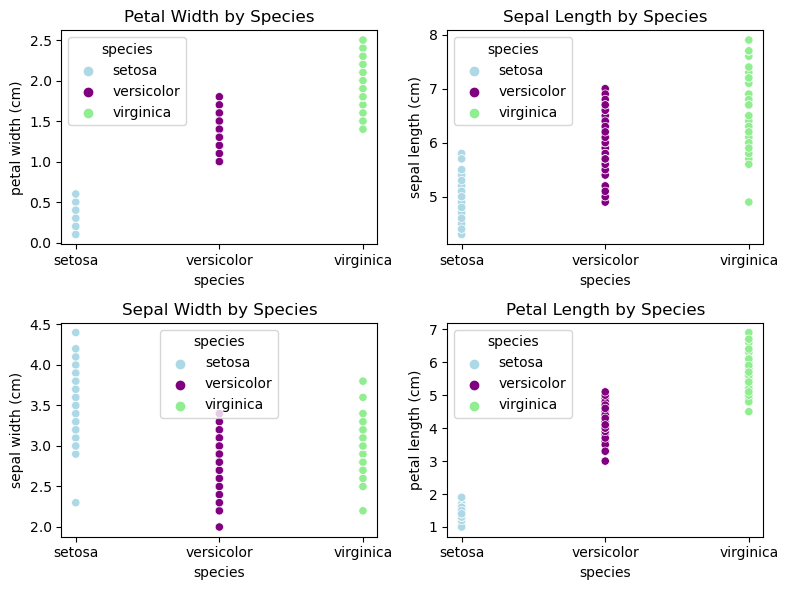

In [2]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Define the color palette
palette_colors = {"setosa": "lightblue", "versicolor": "purple", "virginica": "lightgreen"}

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Petal Width and Species
plt.subplot(2, 2, 1) # (rows, columns, panel number)
sns.scatterplot(x='species', y='petal width (cm)', hue='species', palette=palette_colors, data=iris_df)
plt.title('Petal Width by Species')

# Sepal Length and Species
plt.subplot(2, 2, 2)
sns.scatterplot(x='species', y='sepal length (cm)', hue='species', palette=palette_colors, data=iris_df)
plt.title('Sepal Length by Species')

# Sepal Width and Species
plt.subplot(2, 2, 3)
sns.scatterplot(x='species', y='sepal width (cm)', hue='species', palette=palette_colors, data=iris_df)
plt.title('Sepal Width by Species')

# Petal Length and Species
plt.subplot(2, 2, 4)
sns.scatterplot(x='species', y='petal length (cm)', hue='species', palette=palette_colors, data=iris_df)
plt.title('Petal Length by Species')

plt.tight_layout() # Adjust the layout to make sure there's no overlap
plt.show()


# Custom Naive Bayes Classifier

We do the following:

**Model Fitting (fit Method):**

- Class Priors Calculation: Computes the prior probabilities for each class based on the frequency of each class in the training data y.
- Mean and Variance Calculation: For each class, it calculates the mean and variance of the features in the training data X that belong to that class.

**Making Predictions (predict Method):**
- It iterates over each instance x in the dataset X to be predicted. <br>
- For each class, it standardizes x using the class-specific mean and variance vectors. This involves subtracting the mean vector from x and dividing by the square root of the variance vector.
- It calculates the log likelihood of x belonging to each class using the Gaussian (normal) distribution formula, incorporating the standardized feature values.
- It adds the log of the class prior probability to the log likelihood to obtain the log posterior probability for each class. Then, it chooses the class with the highest log posterior probability as the predicted class for x and returns an array of predicted class labels for the input dataset X.

In [3]:
class NaiveBayesClassifier:
    def fit(self, X, y):
        # Calculate class priors
        self.class_priors = {c: np.mean(y == c) for c in np.unique(y)}

        # Calculate mean and variance vectors for each class
        self.mean_vectors = {}
        self.var_vectors = {}
        for c in np.unique(y):
            X_c = X[y == c]
            self.mean_vectors[c] = np.mean(X_c, axis=0)
            self.var_vectors[c] = np.var(X_c, axis=0, ddof=1)

        # Convert the dictionaries to arrays
        self.classes = np.array(list(self.class_priors.keys()))
        n_classes = len(self.classes)
        self.mean = np.array([self.mean_vectors[c] for c in self.classes])
        self.var = np.array([self.var_vectors[c] for c in self.classes])
        self.priors = np.array([self.class_priors[c] for c in self.classes])

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = []
            for idx, c in enumerate(self.classes):
                mean_vector = self.mean[idx, :]
                var_vector = self.var[idx, :]

                # Standardize the test instance using the mean and variance vectors
                x_standardized = (x - mean_vector) / np.sqrt(var_vector)

                log_likelihood = np.sum(
                    -0.5 * np.log(2 * np.pi * var_vector)
                    - 0.5 * ((x_standardized - mean_vector) ** 2) / var_vector
                )
                
                class_probs.append(np.log(self.priors[idx]) + log_likelihood)

            predictions.append(self.classes[np.argmax(class_probs)])

        return np.array(predictions)


# Training and Testing using Custom Naive Bayes Classifier

In [4]:
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# Make predictions on both the training and testing sets
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

# Calculate and print accuracy for both the training and testing sets
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Testing Accuracy: {accuracy_test:.2f}")

# Print classification report for the testing set
report = classification_report(y_test, y_pred_test)
print("Classification Report for Testing Set:\n", report)


Training Accuracy: 0.92
Testing Accuracy: 0.93
Classification Report for Testing Set:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00        11

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



# Training and Testing using using Gaussian Naive Bayes from scikit-learn

In [5]:
# Create and fit the scikit-learn Gaussian Naive Bayes classifier
nb_classifier_sklearn = GaussianNB()
nb_classifier_sklearn.fit(X_train, y_train)

# Make predictions using the scikit-learn Naive Bayes classifier on both the training and testing sets
y_pred_train_sklearn = nb_classifier_sklearn.predict(X_train)
y_pred_test_sklearn = nb_classifier_sklearn.predict(X_test)

# Calculate and print accuracy for both the training and testing sets using the scikit-learn classifier
accuracy_train_sklearn = accuracy_score(y_train, y_pred_train_sklearn)
accuracy_test_sklearn = accuracy_score(y_test, y_pred_test_sklearn)
print(f"scikit-learn Naive Bayes Training Accuracy: {accuracy_train_sklearn:.2f}")
print(f"scikit-learn Naive Bayes Testing Accuracy: {accuracy_test_sklearn:.2f}")

# Print classification report for the scikit-learn classifier on the testing set
report_sklearn = classification_report(y_test, y_pred_test_sklearn)
print("scikit-learn Naive Bayes Classification Report for Testing Set:\n", report_sklearn)


scikit-learn Naive Bayes Training Accuracy: 0.95
scikit-learn Naive Bayes Testing Accuracy: 1.00
scikit-learn Naive Bayes Classification Report for Testing Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

